In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

In [9]:
df_res = pd.read_csv('data.csv')

In [10]:
df_att_ft = pd.read_csv('Data/NB_FT_att.csv')
df_def_ft = pd.read_csv('Data/NB_FT_def.csv')

df_c_ft = pd.read_csv('Data/NB_FT_c.csv')
df_home_ft = pd.read_csv('Data/NB_FT_home.csv')
c_ft = df_c_ft['x'][0]
home_ft = df_home_ft['x'][0]

In [11]:
df_att_2p = pd.read_csv('Data/NB_2p_att.csv')
df_def_2p = pd.read_csv('Data/NB_2p_def.csv')

df_c_2p = pd.read_csv('Data/NB_2p_c.csv')
df_home_2p = pd.read_csv('Data/NB_2p_home.csv')
c_2p = df_c_2p['x'][0]
home_2p = df_home_2p['x'][0]

In [12]:
df_att_3p = pd.read_csv('Data/NB_3p_att.csv')
df_def_3p = pd.read_csv('Data/NB_3p_def.csv')

df_c_3p = pd.read_csv('Data/NB_3p_c.csv')
df_home_3p = pd.read_csv('Data/NB_3p_home.csv')
c_3p = df_c_3p['x'][0]
home_3p = df_home_3p['x'][0]

In [13]:
df_res.head()

,game_id,game_date,home_team,away_team,fg3m_home,ftm_home,pts_home,fg3m_away,ftm_away,pts_away,fg2m_home,fg2m_away,home_win,home_code,away_code
0,20800001,28/10/2008 00:00,BOS,CLE,3,21,90,3,24,85,30,26,1,1,4
1,20800003,28/10/2008 00:00,LAL,POR,7,15,96,10,8,76,30,19,1,12,24
2,20800002,28/10/2008 00:00,CHI,MIL,5,33,108,6,15,95,30,31,1,3,15
3,20800007,29/10/2008 00:00,NYK,MIA,9,27,120,6,25,115,33,36,1,19,14
4,20800004,29/10/2008 00:00,ORL,ATL,4,17,85,5,18,99,28,33,0,21,0


### Create cross plots

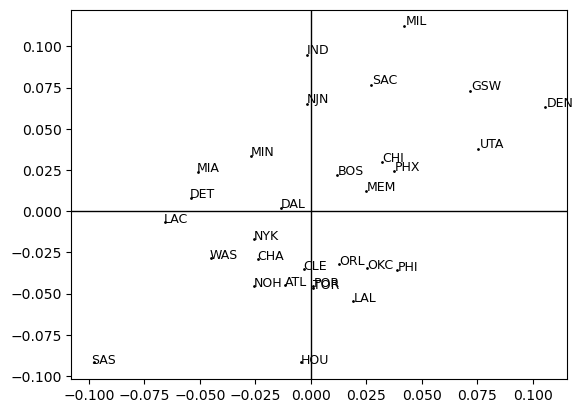

In [14]:
x = df_att_ft['x']
y = df_def_ft['x']
teams = sorted(df_res['home_team'].unique())

plt.scatter(x,y, s=1, c='black')
#plt.grid()
plt.axhline(0, c='black', linewidth = 1)
plt.axvline(0, c='black', linewidth = 1)
for i in range(len(teams)):
    x_hat = x[i]
    y_hat = y[i]
    plt.text(x_hat * (1 + 0.01), y_hat * (1 + 0.01) , teams[i], fontsize=9)


### For each game, estimate pts for home and away team, check who wins

In [22]:
corect_pred = 0
wins = np.zeros(30)
pred_wins = np.zeros(30)


for index, row in df_res.iterrows():
    print(f'Game number {index+1}')
    home_idx = row['home_code'] #- 1
    away_idx = row['away_code'] #- 1
    
    tot_ft_home = np.exp(df_att_ft['x'][home_idx] + df_def_ft['x'][away_idx] + c_ft + home_ft)
    tot_ft_away = np.exp(df_att_ft['x'][away_idx] + df_def_ft['x'][home_idx] + c_ft)

    tot_2p_home = np.exp(df_att_2p['x'][home_idx] + df_def_2p['x'][away_idx] + c_2p + home_ft)
    tot_2p_away = np.exp(df_att_2p['x'][away_idx] + df_def_2p['x'][home_idx] + c_2p)  

    tot_3p_home = np.exp(df_att_3p['x'][home_idx] + df_def_3p['x'][away_idx] + c_3p + home_ft)
    tot_3p_away = np.exp(df_att_3p['x'][away_idx] + df_def_3p['x'][home_idx] + c_3p)      

    home_pts = tot_ft_home + 2*tot_2p_home + 3*tot_3p_home
    away_pts = tot_ft_away + 2*tot_2p_away + 3*tot_3p_away

    print(f'home ponts: {home_pts}')
    print(f'away ponts: {away_pts}')

    if home_pts > away_pts :
        home_win = 1
        pred_wins[home_idx] +=1 
    else: pred_wins[away_idx] +=1
    if home_win == df_res['home_win'][index]:
        corect_pred += 1
        print('Predicted correctly', '\n')    

print(f'Predicted {corect_pred / len(df_res)} games')

for index, row in df_res.iterrows():
    home_idx = row['home_code']
    away_idx = row['away_code']
    if df_res['home_win'][index] == 1:
        wins[home_idx] +=1 
    else: wins[away_idx] +=1

Game number 1
home ponts: 111.7515864780281
away ponts: 108.00956261222282
Predicted correctly 

Game number 2
home ponts: 110.43706028902879
away ponts: 101.4938708729617
Predicted correctly 

Game number 3
home ponts: 133.2247640097467
away ponts: 113.68090018285206
Predicted correctly 

Game number 4
home ponts: 112.93007694842223
away ponts: 100.41834893226309
Predicted correctly 

Game number 5
home ponts: 110.56007046300118
away ponts: 103.60717289615839
Game number 6
home ponts: 103.06119837626667
away ponts: 106.6402351147581
Game number 7
home ponts: 119.95715200124394
away ponts: 112.01477460893801
Game number 8
home ponts: 114.40531411870612
away ponts: 105.1531581402962
Game number 9
home ponts: 122.55166439976183
away ponts: 113.8676806951595
Predicted correctly 

Game number 10
home ponts: 131.86954451822362
away ponts: 122.21704712585466
Predicted correctly 

Game number 11
home ponts: 131.80744515244902
away ponts: 106.6424810279438
Game number 12
home ponts: 105.900024

In [ ]:
pred_wins

array([57., 38., 42., 44., 50., 41., 52., 26., 41., 64., 12., 25., 53.,
       41., 25., 16., 25., 28., 43., 39., 53., 55., 62., 45., 52., 27.,
       40., 54., 51., 29.])

In [23]:
wins

array([47., 62., 35., 41., 66., 50., 54., 39., 29., 53., 36., 19., 65.,
       24., 43., 34., 24., 34., 49., 32., 23., 59., 41., 46., 54., 17.,
       54., 33., 48., 19.])